#LeNet5 on MNIST with SGD
###Effect of training loss vs. Batch size for a fixed learning rate
###Effect of training loss vs. Learning rate for a fixed Batch size

In [0]:
%matplotlib inline
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
import torch.optim as optim

In [0]:
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
BatchSize = 256 

trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range {-90,90}
testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader

In [3]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainLoader.dataset)))
print('No. of samples in test set: '+str(len(testLoader.dataset)))

No. of samples in train set: 60000
No. of samples in test set: 10000


In [0]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [5]:
use_gpu = torch.cuda.is_available()
net = LeNet()
print(net)
if use_gpu:
    print('GPU is available!')
    net = net.cuda()

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
GPU is available!


Epoch 1/10 : Training loss: 0.4751 | Training Accuracy: 84.2433
Epoch 2/10 : Training loss: 0.0717 | Training Accuracy: 97.8017
Epoch 3/10 : Training loss: 0.0486 | Training Accuracy: 98.5067
Epoch 4/10 : Training loss: 0.0386 | Training Accuracy: 98.7817
Epoch 5/10 : Training loss: 0.0304 | Training Accuracy: 99.0650
Epoch 6/10 : Training loss: 0.0269 | Training Accuracy: 99.1233
Epoch 7/10 : Training loss: 0.0210 | Training Accuracy: 99.3283
Epoch 8/10 : Training loss: 0.0183 | Training Accuracy: 99.4217
Epoch 9/10 : Training loss: 0.0148 | Training Accuracy: 99.5267
Epoch 10/10 : Training loss: 0.0134 | Training Accuracy: 99.5767
Epoch 1/10 : Training loss: 1.1406 | Training Accuracy: 62.0433
Epoch 2/10 : Training loss: 0.1246 | Training Accuracy: 96.0667
Epoch 3/10 : Training loss: 0.0766 | Training Accuracy: 97.5433
Epoch 4/10 : Training loss: 0.0585 | Training Accuracy: 98.1317
Epoch 5/10 : Training loss: 0.0465 | Training Accuracy: 98.5367
Epoch 6/10 : Training loss: 0.0409 | Tr

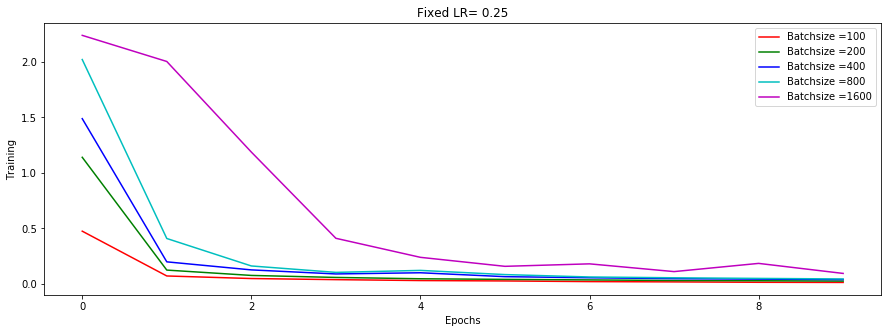

In [6]:
#FIXED LEARNING RATE
from cycler import cycler

num_epochs = 10
BatchSize = 50

fig = plt.figure(figsize=[15,5]) 

for k in range(5):
    net = LeNet()
    criterion = nn.CrossEntropyLoss()

    optimizer = optim.SGD(net.parameters(), lr=0.25)
    learning_rate = 0.1
    train_loss = []
    train_acc = []
    
    
    apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
    BatchSize = BatchSize*2 

    trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
    trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
    testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
    testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader
    
    for epoch in range(num_epochs):
    
        running_loss = 0.0 
        running_corr = 0
        
        for i,data in enumerate(trainLoader):
            inputs,labels = data
            
        # Initializing model gradients to zero
            optimizer.zero_grad() 
        # Data feed-forward through the network
            outputs = net(inputs)
        # Predicted class is the one with maximum probability
            preds = torch.argmax(outputs,dim=1)
        # Finding the loss
            loss = criterion(outputs, labels)
        # Accumulating the loss for each batch
            running_loss += loss 
        # Accumulate number of correct predictions
            running_corr += torch.sum(preds==labels)    
            loss.backward()
            optimizer.step()
    
        # Updating the model parameters
        epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
        epoch_acc = running_corr.item()/60000
    
        train_loss.append(epoch_loss) 
        train_acc.append(epoch_acc) 
        print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))       
        
    plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','c','m','y','k','w'])))
    plt.plot(range(num_epochs),train_loss,label='Batchsize ={:.0f}'.format(BatchSize)) 
    plt.legend(loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Training')
    plt.title("Fixed LR= 0.25")
    
plt.show()
        


Epoch 1/10 : Training loss: 1.1575 | Training Accuracy: 59.7867
Epoch 2/10 : Training loss: 0.1559 | Training Accuracy: 95.0933
Epoch 3/10 : Training loss: 0.0982 | Training Accuracy: 96.9450
Epoch 4/10 : Training loss: 0.0749 | Training Accuracy: 97.7350
Epoch 5/10 : Training loss: 0.0632 | Training Accuracy: 98.0400
Epoch 6/10 : Training loss: 0.0536 | Training Accuracy: 98.3533
Epoch 7/10 : Training loss: 0.0473 | Training Accuracy: 98.5367
Epoch 8/10 : Training loss: 0.0417 | Training Accuracy: 98.7150
Epoch 9/10 : Training loss: 0.0368 | Training Accuracy: 98.7933
Epoch 10/10 : Training loss: 0.0336 | Training Accuracy: 98.9033
Epoch 1/10 : Training loss: 0.7019 | Training Accuracy: 76.1567
Epoch 2/10 : Training loss: 0.1013 | Training Accuracy: 96.7683
Epoch 3/10 : Training loss: 0.0687 | Training Accuracy: 97.8250
Epoch 4/10 : Training loss: 0.0531 | Training Accuracy: 98.3583
Epoch 5/10 : Training loss: 0.0446 | Training Accuracy: 98.6283
Epoch 6/10 : Training loss: 0.0385 | Tr

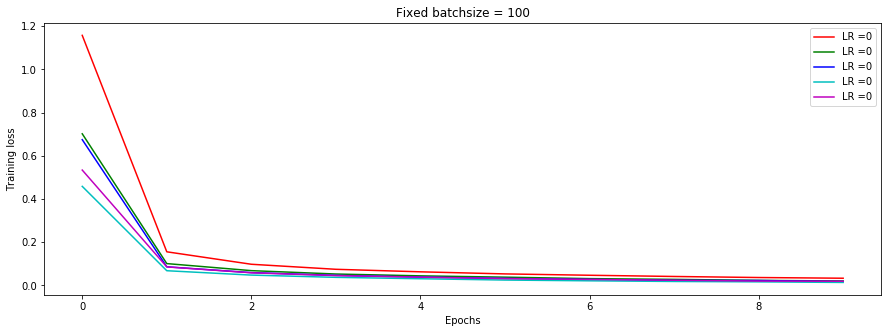

In [7]:
#FIXED BATCH SIZE

from cycler import cycler

num_epochs = 10
BatchSize = 100
learn = 0.05
fig = plt.figure(figsize=[15,5]) 

for k in range(5):
    net = LeNet()
    criterion = nn.CrossEntropyLoss()

    optimizer = optim.SGD(net.parameters(), lr=learn)
    learn = learn + 0.05
    learning_rate = 0.1
    train_loss = []
    train_acc = []
    
    
    apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
     # change according to system specs

    trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
    trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
    testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
    testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader
    
    for epoch in range(num_epochs):
    
        running_loss = 0.0 
        running_corr = 0
        
        for i,data in enumerate(trainLoader):
            inputs,labels = data

        # Initializing model gradients to zero
            optimizer.zero_grad() 
        
        # Data feed-forward through the network
            outputs = net(inputs)
        # Predicted class is the one with maximum probability
            preds = torch.argmax(outputs,dim=1)
        # Finding the loss
            loss = criterion(outputs, labels)
        # Accumulating the loss for each batch
            running_loss += loss 
        # Accumulate number of correct predictions
            running_corr += torch.sum(preds==labels)    
            loss.backward()
            optimizer.step()
        
    
    # Calculating gradients
    
    # Updating the model parameters
    
        
        epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
        epoch_acc = running_corr.item()/60000

        train_loss.append(epoch_loss) 
        train_acc.append(epoch_acc) 
        print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))       
        
    plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','c','m','y','k','w'])))
    plt.plot(range(num_epochs),train_loss,label='LR ={:.000f}'.format(learn)) 
    plt.legend(loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Training loss')
    plt.title("Fixed batchsize = 100")
plt.show()
